In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

In [2]:
df = pd.read_csv('data.csv')
df.drop(['Over18'], axis=1, inplace=True)
df.drop(['EmployeeCount'], axis=1, inplace=True)
df.drop(['StandardHours'], axis=1, inplace=True)

In [3]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [4]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [5]:
categorical_list = [
    'Attrition',
    'BusinessTravel',
    'Department',
    'EducationField',
    'Gender',
    'JobRole',
    'MaritalStatus',
    'OverTime'
]

def get_all_possible_values(df, col):
    return df[col].unique()

In [6]:
convert_dict = {}
for column_name in categorical_list:
    convert_dict[column_name] = get_all_possible_values(df, column_name)

convert_dict

{'Attrition': array(['Yes', 'No'], dtype=object),
 'BusinessTravel': array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object),
 'Department': array(['Sales', 'Research & Development', 'Human Resources'], dtype=object),
 'EducationField': array(['Life Sciences', 'Other', 'Medical', 'Marketing',
        'Technical Degree', 'Human Resources'], dtype=object),
 'Gender': array(['Female', 'Male'], dtype=object),
 'JobRole': array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
        'Manufacturing Director', 'Healthcare Representative', 'Manager',
        'Sales Representative', 'Research Director', 'Human Resources'],
       dtype=object),
 'MaritalStatus': array(['Single', 'Married', 'Divorced'], dtype=object),
 'OverTime': array(['Yes', 'No'], dtype=object)}

In [7]:
for col, values in convert_dict.items():
    df[col] = df[col].map({value: i for i, value in enumerate(values)})

In [8]:
# show the columns that have large std
df.std()

Age                            9.135373
Attrition                      0.367863
BusinessTravel                 0.665455
DailyRate                    403.509100
Department                     0.527792
DistanceFromHome               8.106864
Education                      1.024165
EducationField                 1.431780
EmployeeNumber               602.024335
EnvironmentSatisfaction        1.093082
Gender                         0.490065
HourlyRate                    20.329428
JobInvolvement                 0.711561
JobLevel                       1.106940
JobRole                        2.323902
JobSatisfaction                1.102846
MaritalStatus                  0.730121
MonthlyIncome               4707.956783
MonthlyRate                 7117.786044
NumCompaniesWorked             2.498009
OverTime                       0.450606
PercentSalaryHike              3.659938
PerformanceRating              0.360824
RelationshipSatisfaction       1.081209
StockOptionLevel               0.852077


In [9]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,0,1102,0,1,2,0,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,1,1,279,1,8,1,0,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,0,0,1373,1,2,2,1,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1,1392,1,3,4,0,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,1,0,591,1,2,1,2,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,1,884,1,23,2,2,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,1,0,613,1,6,1,2,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,1,0,155,1,4,3,0,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,1,1,1023,0,2,3,2,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [10]:
Y = df['Education']
X = df.drop(['Education'], axis=1)

In [11]:
Y

0       2
1       1
2       2
3       4
4       1
       ..
1465    2
1466    1
1467    3
1468    3
1469    3
Name: Education, Length: 1470, dtype: int64

In [12]:
X

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,0,1102,0,1,0,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,1,1,279,1,8,0,2,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,0,0,1373,1,2,1,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1,1392,1,3,0,5,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,1,0,591,1,2,2,7,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,1,884,1,23,2,2061,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,1,0,613,1,6,2,2062,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,1,0,155,1,4,0,2064,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,1,1,1023,0,2,2,2065,4,1,...,3,4,0,17,3,2,9,6,0,8


In [13]:
print(type(X))
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, Y_train)

# Make predictions on the test set
Y_pred_rf = rf_classifier.predict(X_test_scaled)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
conf_matrix_rf = confusion_matrix(Y_test, Y_pred_rf)
classification_rep = classification_report(Y_test, Y_pred_rf, zero_division=1)

print(f"Random Forest Model Accuracy: {accuracy_rf}")
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)
print("Random Forest Classification Report:")
print(classification_rep)

Random Forest Model Accuracy: 0.40476190476190477
Random Forest Confusion Matrix:
[[ 2  1 16  3  0]
 [ 2  5 43 13  0]
 [ 3  2 86 27  0]
 [ 3  2 50 26  0]
 [ 0  0  6  4  0]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.20      0.09      0.13        22
           2       0.50      0.08      0.14        63
           3       0.43      0.73      0.54       118
           4       0.36      0.32      0.34        81
           5       1.00      0.00      0.00        10

    accuracy                           0.40       294
   macro avg       0.50      0.24      0.23       294
weighted avg       0.43      0.40      0.35       294



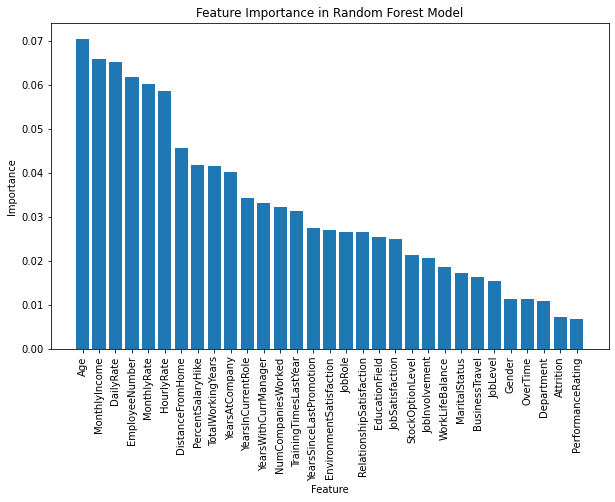

In [15]:
# Assuming rf_classifier is your trained Random Forest model
feature_importance = rf_classifier.feature_importances_

# Assuming X_test is your test set
feature_names = X.columns

# Sort feature importances in descending order
indices = feature_importance.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_test.shape[1]), feature_importance[indices])
plt.xticks(range(X_test.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.show()

In [17]:
# Assuming rf_classifier is your trained Random Forest model
feature_importance = rf_classifier.feature_importances_

# Assuming X_test is your test set
feature_names = X.columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top 10 features
top_10_features = feature_importance_df.head(10)
print(top_10_features)

              Feature  Importance
0                 Age    0.070613
16      MonthlyIncome    0.065872
3           DailyRate    0.065287
7      EmployeeNumber    0.061933
17        MonthlyRate    0.060244
10         HourlyRate    0.058657
5    DistanceFromHome    0.045726
20  PercentSalaryHike    0.041916
24  TotalWorkingYears    0.041546
27     YearsAtCompany    0.040218


In [18]:
# Assuming rf_classifier is your trained Random Forest model
feature_importance = rf_classifier.feature_importances_

# Assuming X_test is your test set
feature_names = X_test.columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})


In [21]:
# Set your threshold
threshold = 0.058  # You can adjust this threshold

# Select features with importance above the threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature']

# Subset your test set with selected features
X_test_selected = X_test[selected_features]


In [22]:
X_test_selected

,Age,DailyRate,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate
1041,28,866,1469,84,8463,23490
184,53,1084,250,57,4450,26250
1222,24,240,1714,58,1555,11585
67,45,1339,86,59,9724,18787
220,36,1396,304,62,5914,9945
...,...,...,...,...,...,...
567,34,304,786,60,6274,18686
560,34,167,775,32,5121,4187
945,50,1322,1317,43,16880,22422
522,37,1225,715,80,4680,15232


In [30]:
Y = df['Education']
X = df.drop(['Education'], axis=1)
keep_X = ['Age', 
          'MonthlyIncome', 
          'DailyRate', 
          'MonthlyRate', 
          'HourlyRate']
X = X[keep_X]

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, Y_train)

# Make predictions on the test set
Y_pred_rf = rf_classifier.predict(X_test_scaled)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
conf_matrix_rf = confusion_matrix(Y_test, Y_pred_rf)
classification_rep = classification_report(Y_test, Y_pred_rf, zero_division=1)

print(f"Random Forest Model Accuracy: {accuracy_rf}")
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)
print("Random Forest Classification Report:")
print(classification_rep)

Random Forest Model Accuracy: 0.36054421768707484
Random Forest Confusion Matrix:
[[ 5  3 11  3  0]
 [ 1  8 29 25  0]
 [ 6  5 66 41  0]
 [ 2 10 42 27  0]
 [ 0  1  4  5  0]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.36      0.23      0.28        22
           2       0.30      0.13      0.18        63
           3       0.43      0.56      0.49       118
           4       0.27      0.33      0.30        81
           5       1.00      0.00      0.00        10

    accuracy                           0.36       294
   macro avg       0.47      0.25      0.25       294
weighted avg       0.37      0.36      0.34       294

